# 타이타닉 생존율 분석 해보기
## 상관분석, 상관 계수, 피어슨 상관 계수, 히트맵 
### 타이타닉 데이터 seaborn 내장 데이터 셋 
### 전처리 비슷하게, null  값을 , 최빈값(가장 빈도가 높은 데이터), 중앙값 대체 
### 파이 차트, 갯수 차트, 히트맵, 시각화 
### 1) 모든 변수 간 상관계수 구하고, 2) 지정한 두 변수 간 상관계수도 구하기. 

## 용어정리 
### 상관 분석 : 두 변수가 어떤 선형적 관계에 있는지 분석 하는 방법. 
### 두 변수의 관계의 강도를 상관관계라고 함. 
### 상관관계의 정도를 나타내는 단위를 모상관 계수 p(파이)를 사용함. by 위키피디아 

### 단순 상관 분석: 두 변수 사이의 어느 정도 강한 관계 인지. 
### 다중 상관 분석 : 세 개이상의 변수 간 관계의 강도를 측정. 

### 상관계수 : + , - , 독립변수가, 종속 변수에 어떠한 영향을 미치는지, 
### x 증가시, y도 증가하는지, 아니면 감소하는지? 
### 이번에는 수치를 구간을 나눠서, 어느정도 연관성이 있는지 수치화해서, 예측하기. 

### 피어슨 상관계수 : 많이 사용하는 예제다. 
### ex) 0.0 ~ 0.2 : 상관관계가 거의 없다. 
### ex) 0.2 ~ 0.4 : 약한 상관관계가 있다. 
### ex) 0.4 ~ 0.6 : 상관관계가 있다. 
### ex) 0.6 ~ 0.8 : 강한 상관관계가 있다. 
### ex) 0.8 ~ 1.0 : 매우 강한 상관관계가 있다. 


In [3]:
# 데이터 수집 
import seaborn as sns 
import pandas as pd 
titanic = sns.load_dataset("titanic")
# print(titanic)
titanic.to_csv("D:/BigDataMLVisual501/1-통계분석_/titanic_2.csv", index=False)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [2]:
 # survived: 생존 여부 - 결측값 0개
 # pclass: 승객 등급 - 결측값 0개
 # sex: 성별 - 결측값 0개
 # age: 나이 - 결측값 177개
 # sibsp: 동반한 형제자매/배우자 수 - 결측값 0개
 # parch: 동반한 부모/자녀 수 - 결측값 0개
 # fare: 요금 - 결측값 0개
 # embarked: 탑승한 항구 - 결측값 2개
 # class: 클래스(객실 등급) - 결측값 0개
 # who: 승객의 신분(남자, 여자, 아이) - 결측값 0개
 # adult_male: 성인 남성 여부 - 결측값 0개
 # deck: 갑판 - 결측값 688개
 # embark_town: 탑승한 도시 - 결측값 2개
 # alive: 생존 여부 - 결측값 0개
 # alone: 혼자인지 여부 - 결측값 0개

# 데이터 준비 
# 비어 있는 컬럼들 조사 (결측값, 누락된값):
# age, embarked, deck , embark_town 
# 정확한 분석이 어렵기 때문에, 대체 값으로 채울 예정. 
# age -> 중앙값으로 값을 대체, embarked, deck , embark_town : 최빈값()으로 대체 하자. 
# 임의로 정했음. (룰을 임의로 정함, 데이터가 부족하거나, 표본 집단을 정하는 경우도 많음.)
# 최빈값 : 예) 카테고리  suv(70개) , 승용차(100개) , 전기차(30개) -> 승용차 최빈값.  

# titanic , 메모리 상에 있는 데이터를 기본 조사, 널 조사. 
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# age, embarked, deck , embark_town 
# 정확한 분석이 어렵기 때문에, 대체 값으로 채울 예정. 
# age -> 중앙값으로 값을 대체, 
# titanic['age'].median() : 중앙값
# fillna 함수 이용해서, null 값에 , 해당 인자값 , 중앙값으로 채우기. 
# 다신, age 컬럼에 비어있는 값에, 중앙값으로 채우기. 
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
# 결과 확인. 
titanic.isnull().sum()

# embarked, deck , embark_town : 최빈값()으로 대체 하자.
# embarked 컬럼의 최빈값 조사 -> S    644 , 사용
titanic["embarked"].value_counts()

# deck -> C    59 ,당첨 
titanic["deck"].value_counts()

# embark_town -> Southampton    644, 당첨
titanic["embark_town"].value_counts()

# 조사 후 , 해당 값으로 , 컬럼의 빈값에, 대체 하기. 
titanic["embarked"] = titanic["embarked"].fillna("S")
titanic["deck"] = titanic["deck"].fillna("C")
titanic["embark_town"] = titanic["embark_town"].fillna("Southampton")

# 다시, 결측값 조사. 
# 결과 확인. 
titanic.isnull().sum()



survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [5]:
# 데이터 탐색. 
# info 함수 이용해서, 기본 정보 확인. 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# 종속 변수 survived, 생존자 수를 확인. 
# 답이 있어요. 지도 학습. 
# 사망자: 549명, 생존자: 342명. 
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

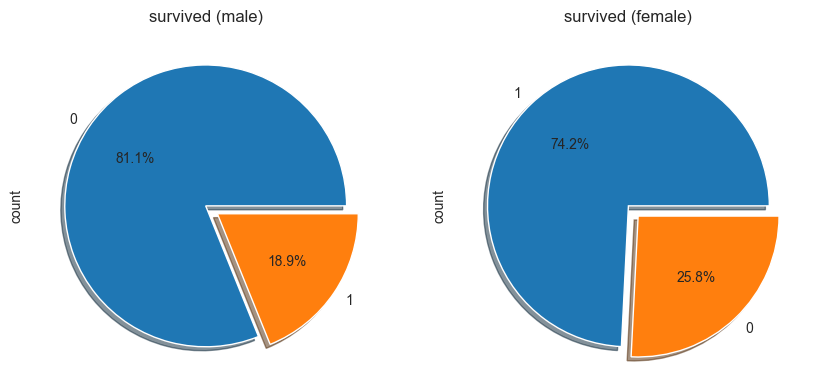

In [7]:
# 기본적인 차트 그리기, 시각화 하기. 
import matplotlib.pyplot as plt 
f, ax = plt.subplots(1,2, figsize= (10,5))

# 시각화 속성 옵션 설정하기. 
titanic['survived'][titanic["sex"] =='male'].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)

# 시각화 속성 옵션 설정하기. 
titanic['survived'][titanic["sex"] =='female'].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[1], shadow = True)

# 제목 
ax[0].set_title("survived (male)")
ax[1].set_title("survived (female)")

plt.show()



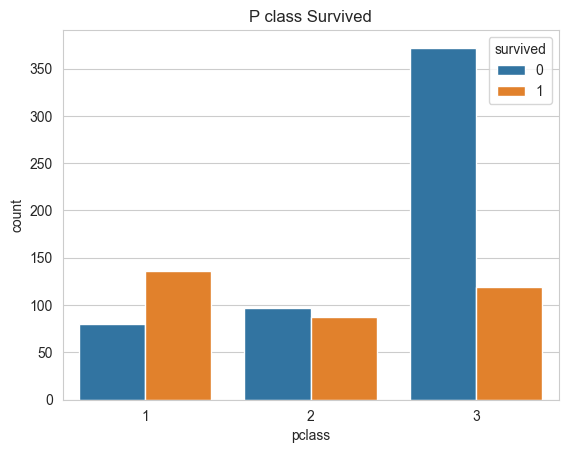

In [8]:
# 객실 등급별 생존자수 차트 그리기. hue = 속성, 종속변수
sns.countplot( x= "pclass", hue="survived", data=titanic)
plt.title("P class Survived")
plt.show()

In [9]:
# 데이터 모델링 
# 상관 분석은 , pandas 에서 제공하는 corr() 함수 이용하고, 
# 상관 계수 : 피어슨 상관계수를 이용.
# titanic.info()
# 문제점, 해당 데이터 프레임에 숫자가 아닌 문자열이 포함이 되어서, 변환을 못한다는 에러 
# 확인 시에는 알아서, 해당 숫자 컬럼만 선택을 했었는데, 다시, 기존 코드부분 확인하니. 
# 되었던 코드도 안되는 상황이라서, 
# chat gpt에게, corr 함수 속성에서, 숫자 부분만 선택하는 부분을 질문에 답을 받아서, 수정. 

# titanic_corr = titanic.corr(method = 'pearson')
# 해결책 -> 해당 데이터 프레임에서, 숫자 부분 컬럼만 가져오기. 
import numpy as np
numeric_titanic = titanic.select_dtypes(include=[np.number])
# 숫자 필드로만 구성된 데이터 프레임 확인. 
# numeric_titanic 
titanic_corr = numeric_titanic.corr(method = 'pearson')
titanic_corr

# csv 파일로 변환 
titanic_corr.to_csv("D:/BigDataMLVisual501/1-통계분석_/titanic_corr.csv", index=False)


In [16]:
# 특정 변수의 상관관계 분석 해보기. adult_male
titanic["survived"].corr(titanic["adult_male"])

# 특정 변수의 상관관계 분석 해보기. fare
titanic["survived"].corr(titanic["fare"])

0.2573065223849622

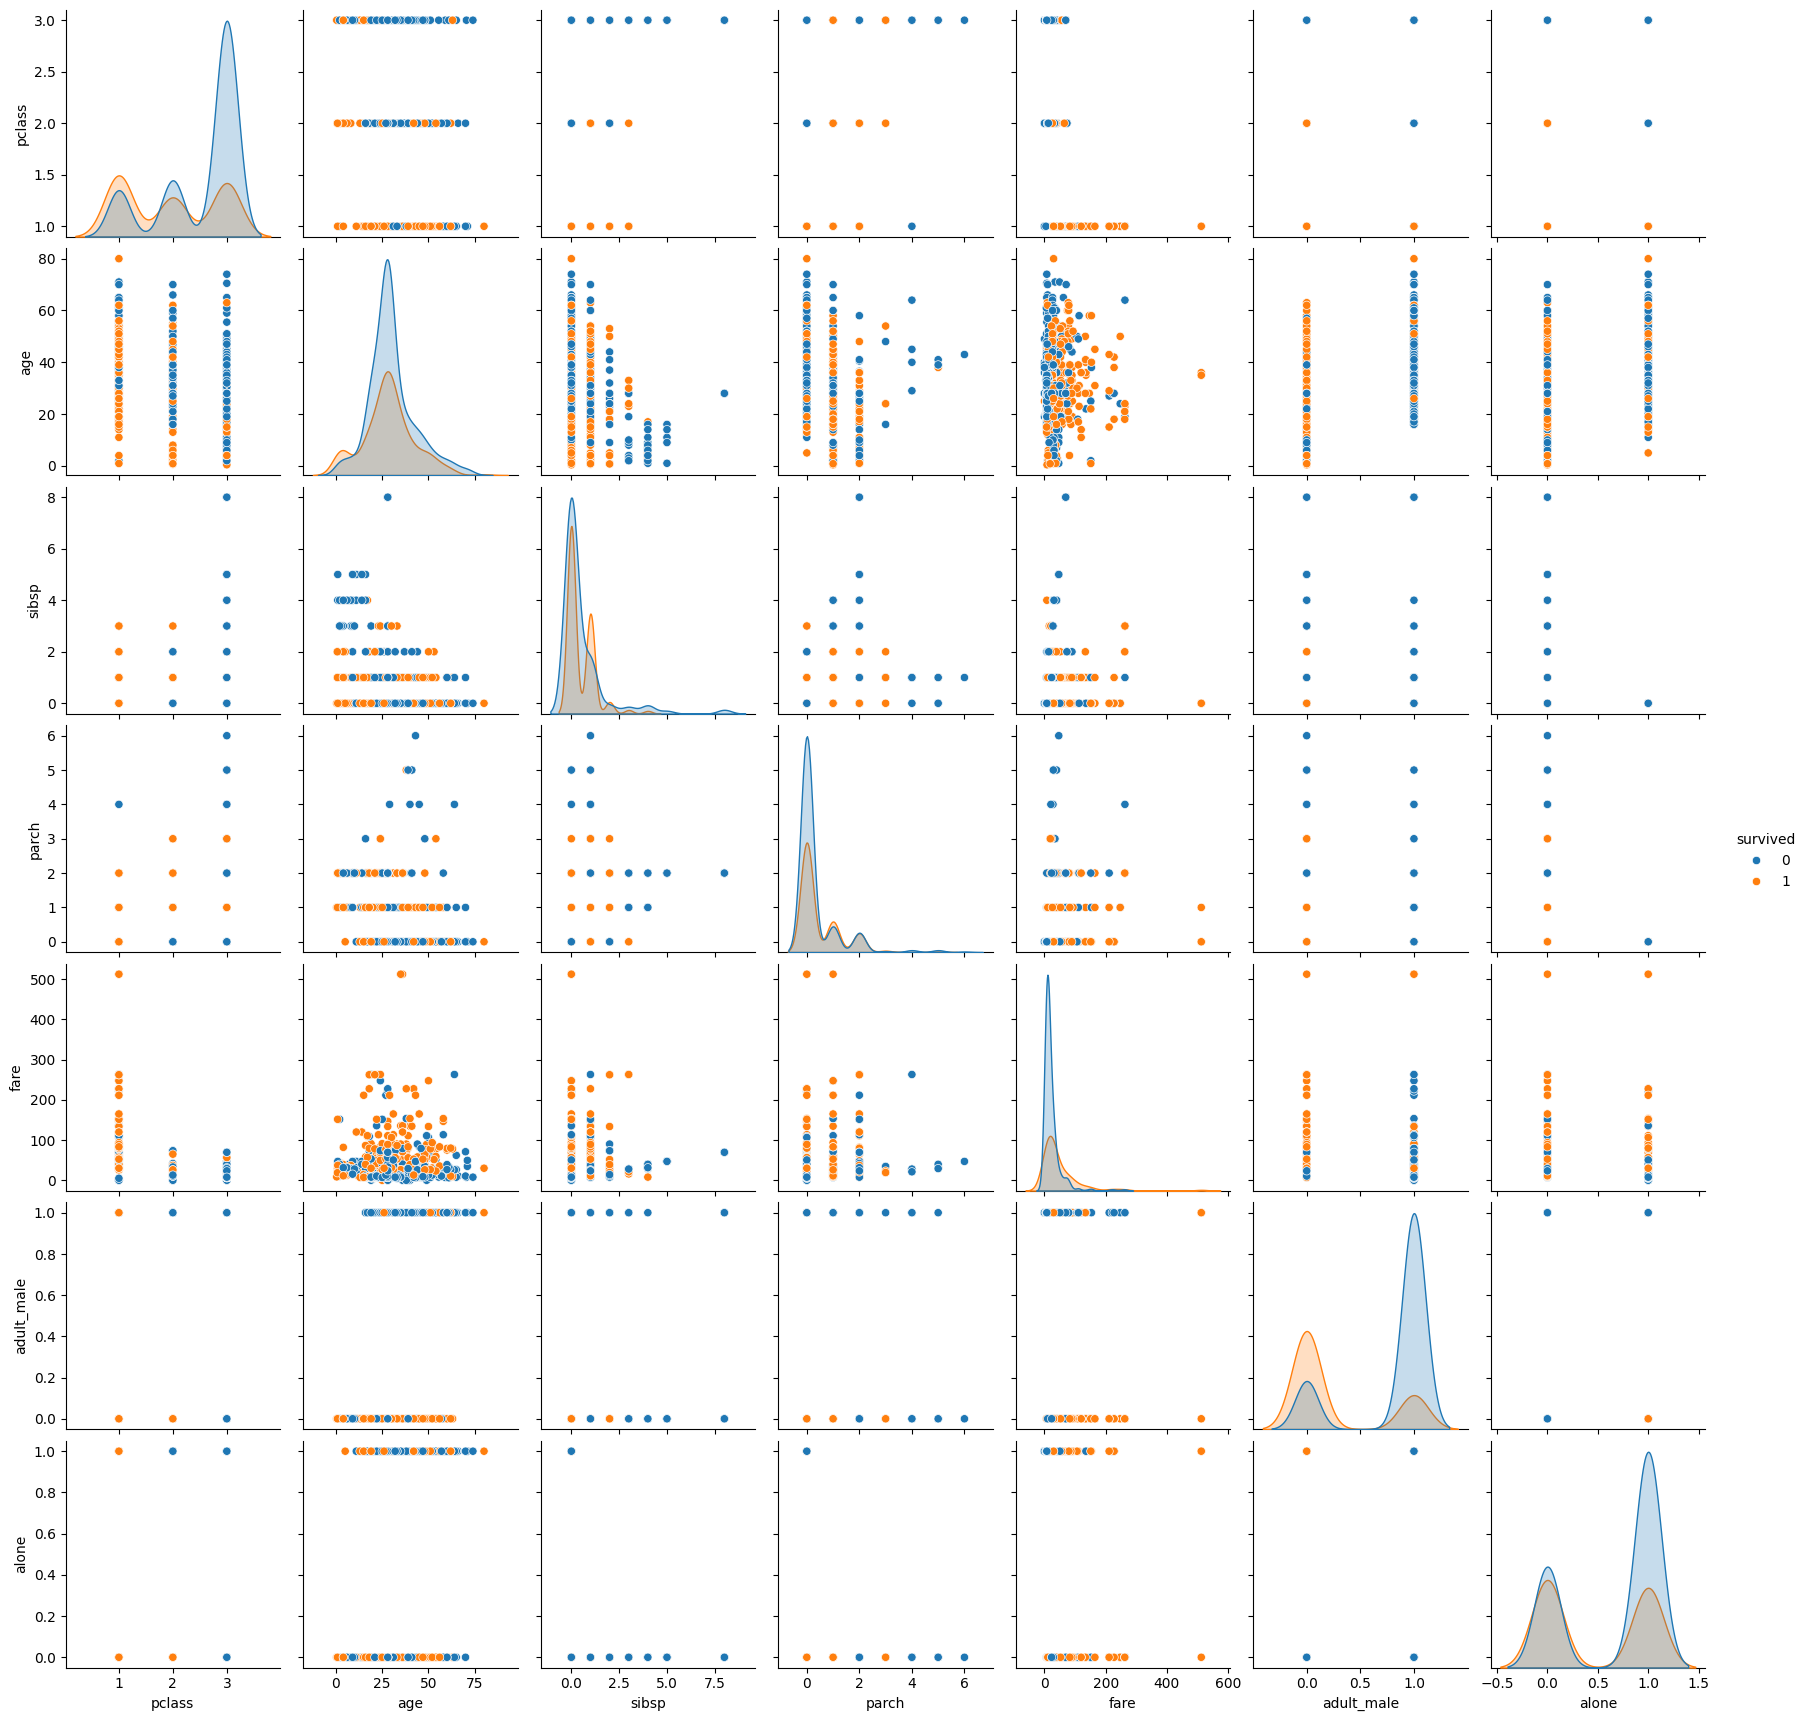

In [17]:
# 시각화 해보기. 
# seaborn 패키지의 pairplot() 이용해서 시각화
# pairplot -> 그리드(표) 형태로 각 데이터 열의 조합을 산점도(scatter plot)로 그린다. 
# 같은 데이터가 만나는 대각선 부분은 히스토 그램으로 그리기. 

sns.pairplot(titanic, hue="survived")
plt.show()

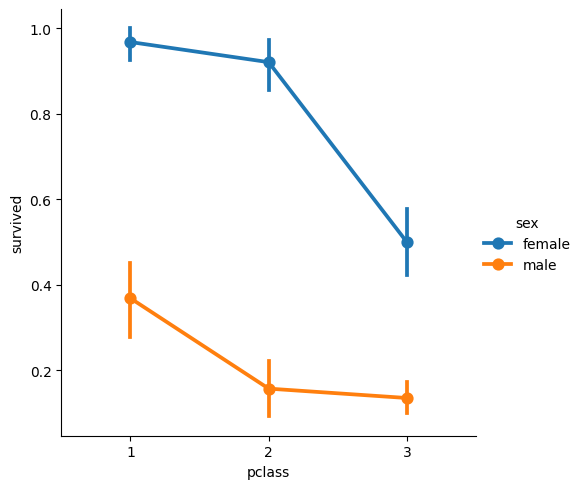

In [18]:
# 두 개의 변수의 상관관계 차트 그리기. 
sns.catplot(x="pclass", y="survived", hue= "sex", data=titanic, kind="point")
plt.show()

In [10]:
# 히트 맵으로 시각화하기. 
# 각 변수들에 대해서, 상관 관계 계수를, 해당 영역에 온도로 표시를 함. 
# 관련이 높을 수록, 뜨거운 온도를 빚대어서, 빨간색으로 표시, 음의 상관 관계이면, 파란색으로 

# 변수 중에 age : 나이 구간별로, 카테고리 작업해서, 시각화를 용이하게 할려고.
# 10 살 미만 : 카테고리 0
# 10 살 이상 ~ 20살 미만 : 카테고리 1
# 20 살 이상 ~ 30살 미만 : 카테고리 2
# 30 살 이상 ~ 40살 미만 : 카테고리 3
# 40 살 이상 ~ 50살 미만 : 카테고리 4
# 50 살 이상 ~ 60살 미만 : 카테고리 5
# 60 살 이상 ~ 70살 미만 : 카테고리 6
# 80 살 이상 ~ : 카테고리 7

def catogoryAge(x):
  if x < 10:
    return 0
  elif x <20:
    return 1
  elif x <30:
    return 2
  elif x <40:
    return 3
  elif x <50:
    return 4
  elif x <60:
    return 5
  elif x <70:
    return 6
  else:
    return 7

# 새로운 카테고리 컬럼 categoryAge => age2
titanic['age2'] = titanic["age"].apply(catogoryAge)

# 성비도 문자열에서, 남자 : 1, 여자 : 0 
titanic["sex"] = titanic["sex"].map({"male" : 1, "female" : 0})

# 가족의 수를 따로 컬럼을 추가하기. family
# sibsp : 형제 자매, 배우자 , parch: 부모, 어린이 
titanic["family"] = titanic["sibsp"] + titanic["parch"] + 1

# 새로운 데이터를 csv 파일로 변환 
titanic.to_csv("D:/BigDataMLVisual501/1-통계분석_/titanic_240808_new_family.csv", index=False)

<Axes: >

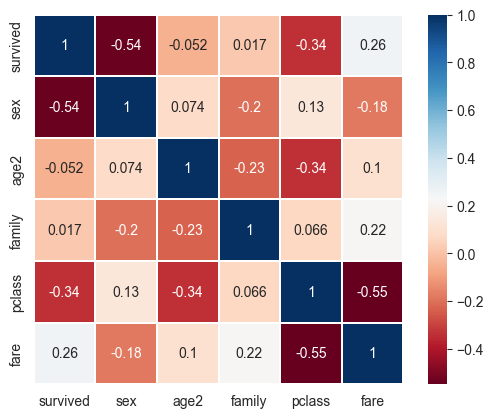

In [11]:
# 데이터를 새로 변경 후, 히트맵 그리기 
heatmap_data = titanic[["survived", "sex", "age2", "family", "pclass","fare"]]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax= 1.0 , square=True, cmap = colormap, linecolor="white", annot = True, annot_kws={"size": 10})
